In [1]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

# setup plotting
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
inJupyterLab = any(filter(lambda x: x.endswith("jupyter-lab"), psutil.Process().parent().cmdline()))
if not inJupyterLab:
    from IPython import get_ipython
    get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")

# 1 Intuition on SVD

In [2]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)

## 1b

In [3]:
# YOUR PART
U_M1, s_M1, Vt_M1 = np.linalg.svd(M1)
S_M1 = np.diag(s_M1)
rank_M1 = np.sum(s_M1 > 1e-10)
print(f'Rank of M1: {rank_M1}')

print(f'U: {U_M1}')
print(f'S: {S_M1}')
print(f'Vt: {Vt_M1}')

Rank of M1: 1
U: [[-0.57735027 -0.57735027  0.          0.         -0.57735027]
 [-0.57735027 -0.21132487  0.          0.          0.78867513]
 [-0.57735027  0.78867513  0.          0.         -0.21132487]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]]
S: [[3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Vt: [[-0.57735027 -0.57735027 -0.57735027 -0.         -0.        ]
 [ 0.         -0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [ 0.81649658 -0.40824829 -0.40824829  0.          0.        ]]


In [4]:
U_M2, s_M2, Vt_M2 = np.linalg.svd(M2)
S_M2 = np.diag(s_M2)
rank_M2 = np.sum(s_M2 > 1e-10)
print(f'Rank of M2: {rank_M2}')

print(f'U: {U_M2}')
print(f'S: {S_M2}')
print(f'Vt: {Vt_M2}')

Rank of M2: 1
U: [[ 0.          0.          0.          0.          1.        ]
 [-0.57735027 -0.57735027 -0.57735027  0.          0.        ]
 [-0.57735027  0.78867513 -0.21132487  0.          0.        ]
 [-0.57735027 -0.21132487  0.78867513  0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]]
S: [[5.19615242 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Vt: [[-0.         -0.66666667 -0.33333333 -0.66666667 -0.        ]
 [ 0.          0.74535599 -0.2981424  -0.59628479  0.        ]
 [ 0.          0.         -0.89442719  0.4472136   0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [ 1.          0.          0.          0.          0.        ]]


In [5]:
U_M3, s_M3, Vt_M3 = np.linalg.svd(M3)
S_M3 = np.diag(s_M3)
rank_M3 = np.sum(s_M3 > 1e-10)
print(f'Rank of M3: {rank_M3}')

print(f'U: {U_M3}')
print(f'S: {S_M3}')
print(f'Vt: {Vt_M3}')

Rank of M3: 1
U: [[ 0.          0.          0.          1.          0.        ]
 [-0.5        -0.5        -0.5         0.         -0.5       ]
 [-0.5         0.83333333 -0.16666667  0.         -0.16666667]
 [-0.5        -0.16666667  0.83333333  0.         -0.16666667]
 [-0.5        -0.16666667 -0.16666667  0.          0.83333333]]
S: [[3.46410162 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Vt: [[-0.         -0.57735027 -0.57735027 -0.57735027]
 [ 0.          0.81649658 -0.40824829 -0.40824829]
 [ 0.          0.         -0.70710678  0.70710678]
 [ 1.          0.          0.          0.        ]]


In [6]:
U_M4, s_M4, Vt_M4 = np.linalg.svd(M4)
S_M4 = np.diag(s_M4)
rank_M4 = np.sum(s_M4 > 1e-10)
print(f'Rank of M4: {rank_M4}')

print(f'U: {U_M4}')
print(f'S: {S_M4}')
print(f'Vt: {Vt_M4}')

Rank of M4: 2
U: [[-0.57735027  0.          0.         -0.57735027 -0.57735027]
 [-0.57735027  0.          0.         -0.21132487  0.78867513]
 [-0.57735027  0.          0.          0.78867513 -0.21132487]
 [ 0.         -0.70710678 -0.70710678  0.          0.        ]
 [ 0.         -0.70710678  0.70710678  0.          0.        ]]
S: [[3. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Vt: [[-0.57735027 -0.57735027 -0.57735027 -0.         -0.        ]
 [-0.         -0.         -0.         -0.70710678 -0.70710678]
 [ 0.          0.          0.         -0.70710678  0.70710678]
 [ 0.         -0.70710678  0.70710678  0.          0.        ]
 [ 0.81649658 -0.40824829 -0.40824829  0.          0.        ]]


In [7]:
U_M5, s_M5, Vt_M5 = np.linalg.svd(M5)
S_M5 = np.diag(s_M5)
rank_M5 = np.sum(s_M5 > 1e-10)
print(f'Rank of M5: {rank_M5}')

print(f'U: {U_M5}')
print(f'S: {S_M5}')
print(f'Vt: {Vt_M5}')

Rank of M5: 3
U: [[-3.94102719e-01 -5.00000000e-01  3.07706105e-01  7.07106781e-01
   8.20464505e-17]
 [-3.94102719e-01 -5.00000000e-01  3.07706105e-01 -7.07106781e-01
  -8.74570269e-17]
 [-6.15412209e-01 -5.55111512e-17 -7.88205438e-01  0.00000000e+00
   5.41057639e-18]
 [-3.94102719e-01  5.00000000e-01  3.07706105e-01  0.00000000e+00
  -7.07106781e-01]
 [-3.94102719e-01  5.00000000e-01  3.07706105e-01  1.11022302e-16
   7.07106781e-01]]
S: [[3.56155281e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.61552813e-01 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.02510438e-17
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
Vt: [[-3.94102719e-01 -3.94102719e-01 -6.15412209e-01 -3.94102719e-01
  -3.94102719e-01]
 [-5.00000000e-01 -5.00000000e-01 -2.77555756e-16  5.00000000e-0

In [8]:
U_M6, s_M6, Vt_M6 = np.linalg.svd(M6)
S_M6 = np.diag(s_M6)
rank_M6 = np.sum(s_M6 > 1e-10)
print(f'Rank of M6: {rank_M6}')

print(f'U: {U_M6}')
print(f'S: {S_M6}')
print(f'Vt: {Vt_M6}')

Rank of M6: 2
U: [[-4.61939766e-01 -1.91341716e-01  8.36419811e-01  2.24503673e-01
  -6.26480542e-18]
 [-4.61939766e-01 -1.91341716e-01 -4.90470696e-01  7.13749603e-01
   4.61301405e-17]
 [-3.82683432e-01  9.23879533e-01  2.22044605e-16 -4.16333634e-17
  -3.16700201e-18]
 [-4.61939766e-01 -1.91341716e-01 -1.72974557e-01 -4.69126638e-01
  -7.07106781e-01]
 [-4.61939766e-01 -1.91341716e-01 -1.72974557e-01 -4.69126638e-01
   7.07106781e-01]]
S: [[4.82842712e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 8.28427125e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.43075238e-16 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.99007148e-18
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.13821177e-50]]
Vt: [[-4.61939766e-01 -4.61939766e-01 -3.82683432e-01 -4.61939766e-01
  -4.61939766e-01]
 [ 1.91341716e-01  1.91341716e-01 -9.23879533e-01  1.91341716e-0

## 1c

In [ ]:
# You can use the functions svdcomp and plot_matrix from util.py
# YOUR PART

## 1d

In [ ]:
# Another method to compute the rank is matrix_rank.
# YOUR PART

# 2 The SVD on Weather Data

In [9]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

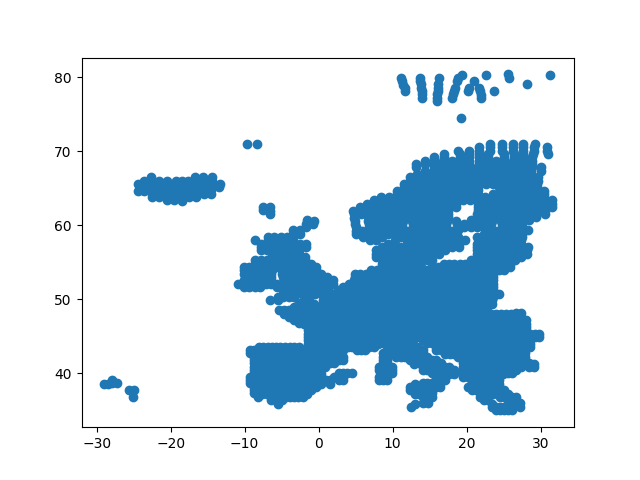

In [10]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [11]:
climate.columns

Index(['min1', 'min2', 'min3', 'min4', 'min5', 'min6', 'min7', 'min8', 'min9',
       'min10', 'min11', 'min12', 'max1', 'max2', 'max3', 'max4', 'max5',
       'max6', 'max7', 'max8', 'max9', 'max10', 'max11', 'max12', 'avg1',
       'avg2', 'avg3', 'avg4', 'avg5', 'avg6', 'avg7', 'avg8', 'avg9', 'avg10',
       'avg11', 'avg12', 'rain1', 'rain2', 'rain3', 'rain4', 'rain5', 'rain6',
       'rain7', 'rain8', 'rain9', 'rain10', 'rain11', 'rain12'],
      dtype='object')

In [12]:
# YOUR PART
# Normalize the data to z-scores. Store the result in X.
X = (climate - climate.mean()) / climate.std()

print(f'For each feature, its mean is (approximately) equal to zero: {(X.mean().abs() < 1e-6).all()}')
print(f'For each feature, its standard deviation is (approximately) equal to 1:{(X.std().sub(1).abs() < 1e-6).all()}')

For each feature, its mean is (approximately) equal to zero: True
For each feature, its standard deviation is (approximately) equal to 1:True


C:\Users\Liza_N\AppData\Local\Temp\ipykernel_9032\2722728386.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(ax=plt.gca())


array([[<Axes: title={'center': 'min1'}>,
        <Axes: title={'center': 'min2'}>,
        <Axes: title={'center': 'min3'}>,
        <Axes: title={'center': 'min4'}>,
        <Axes: title={'center': 'min5'}>,
        <Axes: title={'center': 'min6'}>,
        <Axes: title={'center': 'min7'}>],
       [<Axes: title={'center': 'min8'}>,
        <Axes: title={'center': 'min9'}>,
        <Axes: title={'center': 'min10'}>,
        <Axes: title={'center': 'min11'}>,
        <Axes: title={'center': 'min12'}>,
        <Axes: title={'center': 'max1'}>,
        <Axes: title={'center': 'max2'}>],
       [<Axes: title={'center': 'max3'}>,
        <Axes: title={'center': 'max4'}>,
        <Axes: title={'center': 'max5'}>,
        <Axes: title={'center': 'max6'}>,
        <Axes: title={'center': 'max7'}>,
        <Axes: title={'center': 'max8'}>,
        <Axes: title={'center': 'max9'}>],
       [<Axes: title={'center': 'max10'}>,
        <Axes: title={'center': 'max11'}>,
        <Axes: title={'cen

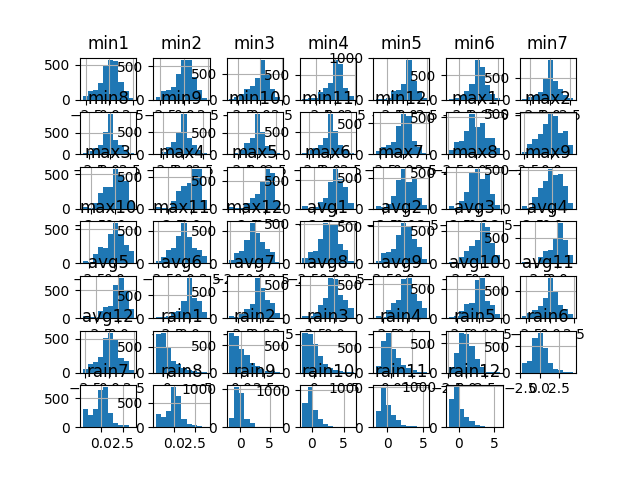

In [13]:
# Plot histograms of attributes
nextplot()
X.hist(ax=plt.gca())

## 2b

In [21]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?
# YOUR PART
U, s, Vt = np.linalg.svd(X)
S = np.diag(s)

rank_X = np.sum(s > 1e-10)
print(f'Rank of the data is {rank_X}')

Rank of the data is 48


## 2c

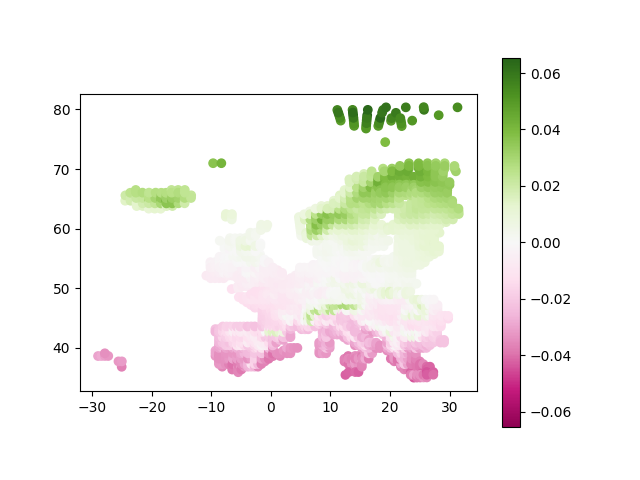

In [22]:
# Here is an example plot.
plot_xy(lon, lat, U[:, 0])

In [ ]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART

## 2d

In [ ]:
# Here is an example.
plot_xy(U[:, 0], U[:, 1], lat - np.mean(lat))

## 2e

In [ ]:
# 2e(i) Guttman-Kaiser
# YOUR PART

In [ ]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART

In [ ]:
# 2e(iv) entropy
# YOUR PART

In [ ]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART

## 2f

In [ ]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART
nextplot()
plt.plot()
plt.xlabel(r"Noise level ($\epsilon$)")
plt.ylabel("Reconstruction RMSE vs. original data")

# 3 SVD and k-means

In [ ]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

In [ ]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plot_xy(lon, lat, X_clusters)

## 3b

In [ ]:
# YOUR PART HERE

## 3c

In [ ]:
# Compute the PCA scores, store in Z (of shape N x k)
k = 2
# YOUR PART HERE

In [ ]:
# cluster and visualize
Z_clusters = KMeans(5).fit(Z).labels_
# match clusters as well as possible (try without)
Z_clusters = match_categories(X_clusters, Z_clusters)
nextplot()
axs = plt.gcf().subplots(1, 2)
plot_xy(lon, lat, X_clusters, axis=axs[0])
axs[0].set_title("Original data")
plot_xy(lon, lat, Z_clusters, axis=axs[1])
axs[1].set_title(f"PCA $(k={k}$)")